## CMPINF 2130 Summer 2022 - Week 02

### Anscombe data in Python

## Load modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Load Anscombe

In [2]:
anscombe = sns.load_dataset('anscombe')

In [3]:
anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


Check the number of unique values for each column.

In [4]:
anscombe.nunique()

dataset     4
x          12
y          43
dtype: int64

Check the number of rows associated with each unique value of a variable.

In [5]:
anscombe.dataset.value_counts()

I      11
II     11
III    11
IV     11
Name: dataset, dtype: int64

## Matplotlib

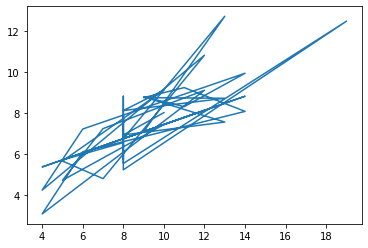

In [6]:
fig, ax = plt.subplots()

ax.plot( anscombe.x, anscombe.y )

plt.show()

Let's simplify the data for now, and let's work with just the first data set like we started in R.

In [7]:
a1 = anscombe.loc[ anscombe.dataset == 'I', : ].copy()

In [8]:
a1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


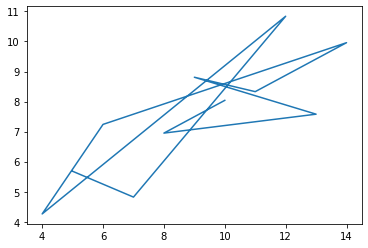

In [9]:
fig, ax = plt.subplots()

ax.plot( a1.x, a1.y )

plt.show()

Force matplotlib to show markers ONLY instead of lines.  

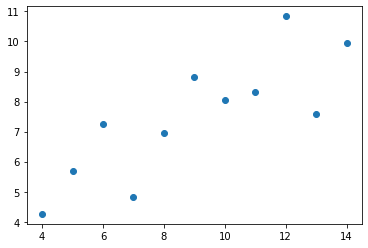

In [10]:
fig, ax = plt.subplots()

ax.plot( a1.x, a1.y, 'o' )

plt.show()

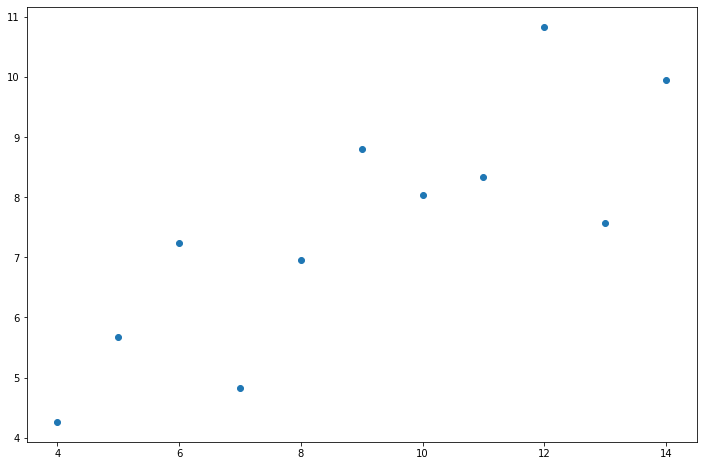

In [13]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot( a1.x, a1.y, 'o' )

plt.show()

We must specify the variable names for the axis labels.

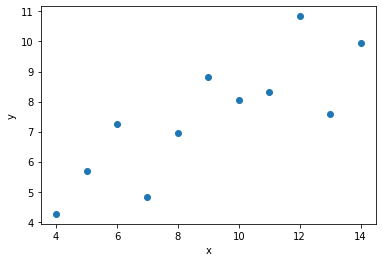

In [14]:
fig, ax = plt.subplots()

ax.plot( a1.x, a1.y, 'o' )

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

The "more correct" method for a scatter plot is the `.scatter()` method.

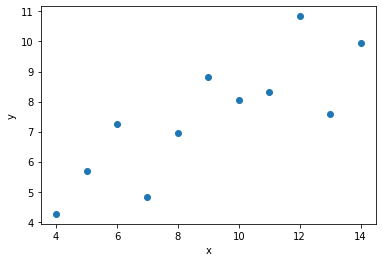

In [15]:
fig, ax = plt.subplots()

ax.scatter( a1.x, a1.y )

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

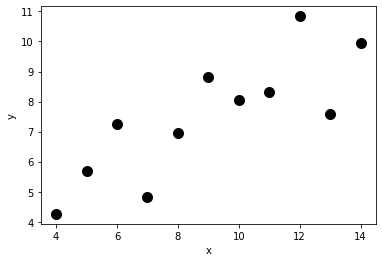

In [18]:
fig, ax = plt.subplots()

ax.scatter( a1.x, a1.y, s=100, color='black' )

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

## Seaborn

Like ggplot everything starts with the data. So there is a `data` argument to every Seaborn function.  

Aesthetics also exist but they are called **semantic variables**. The semantics are the visual properties LINKED to columns in the Pandas dataframe.

But, Seaborn does NOT have an `aes()` function. Semantic variables have DIFFERENT names compared to "hard coding" the visual property.

Geometric objects exist, but instead of working in layers there are separate and distinct functions to call for each geom.

Let's make the scatter plot between `y` and `x` for the first Anscombe data set using Seaborn.

Lastly, there are two flavors for every plotting function: axis-level and figure-level.

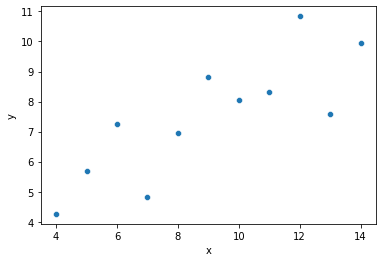

In [19]:
fig, ax = plt.subplots()

sns.scatterplot(data = a1, x ='x', y ='y', ax=ax)

plt.show()

The matploblib arguments allow hard coding properties of the graphic.

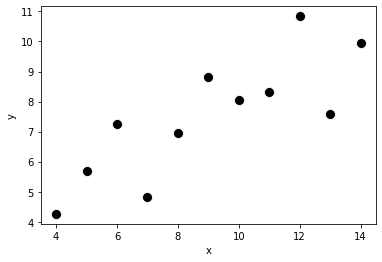

In [21]:
fig, ax = plt.subplots()

sns.scatterplot(data = a1, x ='x', y ='y', s=100, color='black', ax=ax)

plt.show()

The corresponds figure level function has a name based on the **GOAL** of the plot.  

Why a scatter plot? To show a **RELATIONSHIP**!

The figure level function: **rel**ationship **plot**.

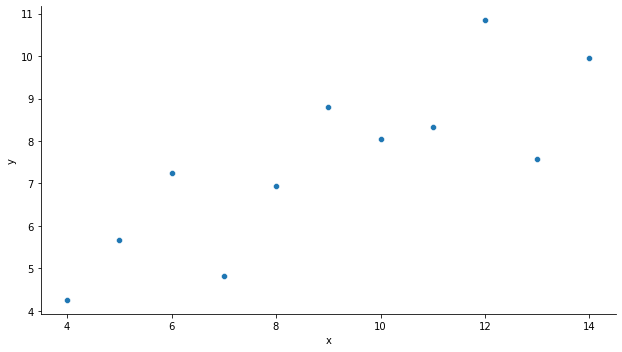

In [26]:
sns.relplot(data = a1, x='x', y='y', kind='scatter', height=5, aspect=1.75)

plt.show()

we hard code properties the same way.

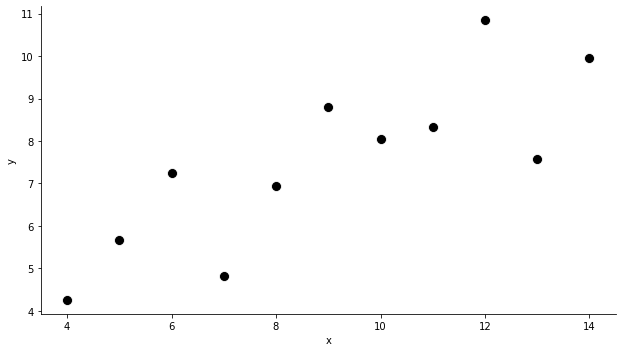

In [27]:
sns.relplot(data = a1, x='x', y='y', s=100, color='black', kind='scatter', height=5, aspect=1.75)

plt.show()

## 4 data sets

Let's calculate the average value for each variable grouped by each data set.

In [29]:
anscombe.groupby(['dataset']).mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


Do the same thing for the variance.

In [30]:
anscombe.groupby(['dataset']).var()

,x,y
dataset,,
I,11.0,4.127269
II,11.0,4.127629
III,11.0,4.122620
IV,11.0,4.123249


In [31]:
anscombe.groupby(['dataset']).describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

Visually compare the 4 data sets.

Let's associate the dataset with the color of the marker via the `hue` semantic variable.

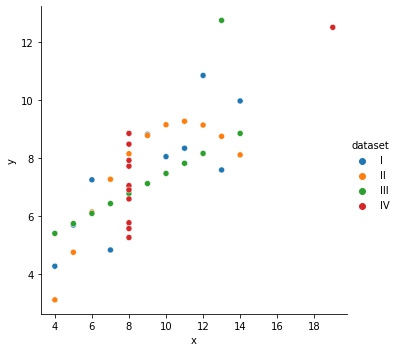

In [32]:
sns.relplot(data = anscombe, x='x', y='y', hue='dataset')

plt.show()

Facets or subplots to compare the datasets or **groups**.

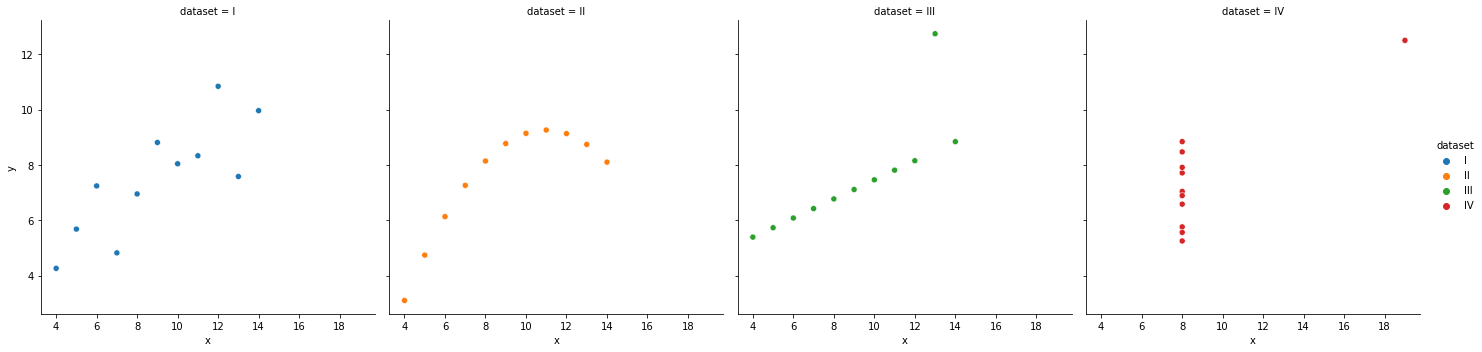

In [33]:
sns.relplot(data = anscombe, x='x', y='y', hue='dataset', col='dataset')

plt.show()

TO show the best fit line in Seaborn we do not add layers, instead there's a different function.

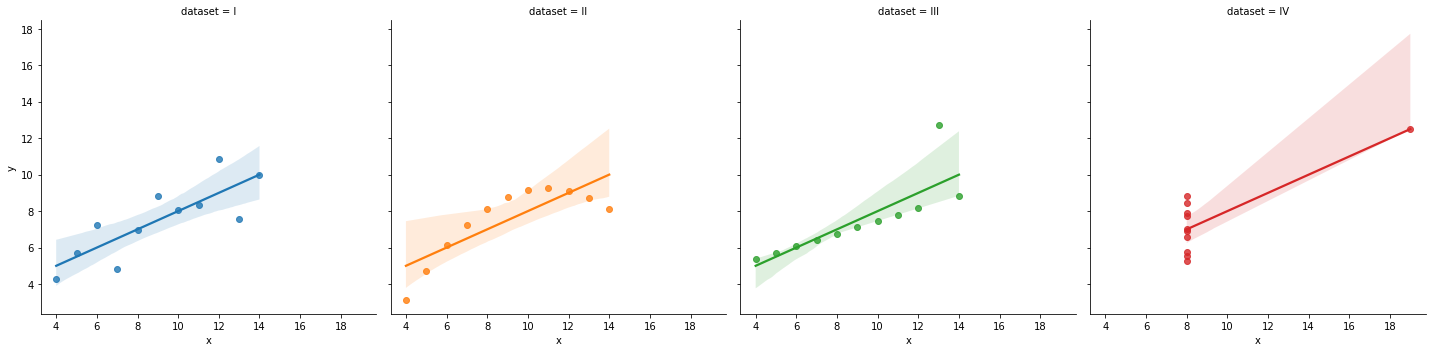

In [34]:
sns.lmplot(data = anscombe, x='x', y='y', hue='dataset', col='dataset')

plt.show()